# Data exploration

The first step of any analysis is to understand what we are searching for. In our analysis we aim to measure the central exclusive di-lepton production, $pp\to p\oplus \ell\ell \oplus p$ process with $\ell\in\{ e,\mu \} $. Feinman diagram of this process are shown bellow: 

<img src="img/diagrams.png" alt="Feinmann diagrams" style="width: 700px;"/>

Where in our case, we will consider only electrons and muons. 

---
The measurement using 2016 data was published in [JHEP07(2018)153](https://arxiv.org/abs/1803.04496). This is the first time the 2017 data will be used to measure the central exclusive di-lepton production process at higher precision.



---
<b>Remark</b>: Exclusive production of $\tau$ leptons was not measured at the LHC yet since $\tau$-leptons differ from electrons and muons by their relatively short lifetime ($c\tau_0=87\mu m$) and are observed only via their decay products. The main challenge with measuring $\tau$s is elusive neutrinos (which escape detection). Hence measurement of the momentum of $\tau$-lepton is tricky. Yet, it is possible because the opening angle between two daughter particles boosted with [lorentz factor](https://en.wikipedia.org/wiki/Lorentz_factor) $\gamma$ is given by $\theta ~\sim 2/\gamma$. With a large enough boost, the opening angle became collinear, and neutrino 4-momentum can be measured.

To understand the process better, we will explore the final state signature. As we discussed earlier, samples are stored in the `h5py` data format, which can be easily accessed with Jupyter notebook. 


In [1]:
#start with standard python imports
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import mplhep as hep
from matplotlib.colors import LogNorm

In [2]:
#to make the plots in CMS style execute this line
plt.style.use([hep.style.ROOT, hep.style.firamath])
plt.style.use(hep.style.CMS)

In [3]:
#Execute this line if running on SWAN, otherwise update the path to the data files:
PATH='/eos/user/c/cmsdas/short-exercises/pps-protons-tutorial/data'
#PATH='output'

## Loading the data (signal)

We will load `h5py` files of the simulated signal events. Note that three different central exclusive di-lepton production processes are considered: exclusive, semi-exclusive, and inclusive (see Figure 1). We will load the files and convert them to pandas datafrme. Let's explore the differences between the processes.

### Dataformat:

We will use the following code `GetData(filename.h5)` to read the `h5` file and convert the data to pandas dataframe.

In [4]:
def GetData(filename):
    with h5py.File(filename, 'r') as f:
        dset = f['protons']
        dset_columns = f['columns']
        columns = list( dset_columns )
        columns_str = [ item.decode("utf-8") for item in columns ]
        return pd.DataFrame( dset, columns=columns_str )
    return pd.DataFrame()

In [5]:
#load the signal samples into the dataframes (takes some time)
df_signal_excl = GetData(PATH+'/output-MC2017-Elastic-Non3+3-PreSel.h5')
df_signal_semiexcl = GetData(PATH+'/output-MC2017-SingleDissociation-Non3+3-PreSel.h5')

In [6]:
#Load the data samples into the dataframes (takes some time)
df_data_b = GetData('output/output-UL2017B-PreSel.h5')
print('output-UL2017B-PreSel shape = ',df_data_b.shape)
#df_data_c1 = GetData('output/output-UL2017C1-PreSel.h5')
#print('output-UL2017C1-PreSel shape = ',df_data_c1.shape)
#df_data_e = GetData('output/output-UL2017E-PreSel.h5')
#print('output-UL2017E-PreSel shape = ',df_data_e.shape)
#df_data_f1 = GetData('output/output-UL2017F1-PreSel.h5')
#print('output-UL2017F1-PreSel shape = ',df_data_f1.shape)

output-UL2017B-PreSel shape =  (107075, 38)


In [7]:
# combine all dataframes in a single one
df_data = df_data_b
#df_data = pd.concat([df_data_b,df_data_c1,df_data_e,df_data_f1])

### exploring the data files

Similarly to what we did with ROOT files, let's look at the info we have in the dataframes:

In [8]:
def PrintInfoFromDF(df):
    print('Print all branches:')
    print(df.keys())
    print('Size of the data is ',df.shape)

In [9]:
PrintInfoFromDF(df_signal_excl)
PrintInfoFromDF(df_data)

Print all branches:
Index(['Run', 'LumiSection', 'BX', 'EventNum', 'CrossingAngle', 'MultiRP',
       'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
       'Xi', 'T', 'ThX', 'ThY', 'Time', 'TrackThX_SingleRP',
       'TrackThY_SingleRP', 'Track1ThX_MultiRP', 'Track1ThY_MultiRP',
       'Track2ThX_MultiRP', 'Track2ThY_MultiRP', 'Muon0Pt', 'Muon0Eta',
       'Muon0Phi', 'Muon0VtxZ', 'Muon1Pt', 'Muon1Eta', 'Muon1Phi', 'Muon1VtxZ',
       'PrimVertexZ', 'InvMass', 'ExtraPfCands', 'Acopl', 'XiMuMuPlus',
       'XiMuMuMinus'],
      dtype='object')
Size of the data is  (212744, 38)
Print all branches:
Index(['Run', 'LumiSection', 'BX', 'EventNum', 'CrossingAngle', 'MultiRP',
       'Arm', 'RPId1', 'RPId2', 'TrackX1', 'TrackY1', 'TrackX2', 'TrackY2',
       'Xi', 'T', 'ThX', 'ThY', 'Time', 'TrackThX_SingleRP',
       'TrackThY_SingleRP', 'Track1ThX_MultiRP', 'Track1ThY_MultiRP',
       'Track2ThX_MultiRP', 'Track2ThY_MultiRP', 'Muon0Pt', 'Muon0Eta',
       'Muon0Phi', 'M

As you can see, we have 38 different columns and 212744 raws in the file (each raw corresponds to a different event).

<b>TASK 1</b>

Look at distributions of different kinematic variables (among different processes) and try to see if you observe any difference... The code below `PlotFromDF(variable, dataframes, labels)` will plot normalized shapes of selected variables. 


In [10]:
def PlotFromDF(variable, xmin, xmax, nbins, dataframes, _labels, ax, log=False):
    bins = np.linspace(xmin,xmax,nbins)
    data=[]; labels=[]
    for df, label in zip(dataframes, _labels):
        h, _ = np.histogram(df[variable], bins,density=True)
        data.append(h)
        labels.append(label)
    hep.histplot(data, bins, ax=ax, label=labels)
    hep.cms.label(data=True, paper=False, year='2017', ax=ax)
    ax.legend(); 
    ax.set(xlabel=variable, ylabel='p.d.f.')
    if log: plt.yscale("log")

In the following example, we will plot the di-lepton [acoplanarity](https://en.wikipedia.org/wiki/Acoplanarity) defined by:
$$A = 1 - \Delta\phi(\mu,\mu)/\pi$$

In the exclusive events, due to absence of additional radiation, both leptons expected to be produced back-to-back, or with $\Delta\phi(\mu,\mu)\sim\pi$. 

In [11]:
# we will be plotting MC prediction with the data, where the data is mostly populated with background events
procc = [df_signal_excl,df_signal_semiexcl,df_data]
labels = ['Exclusive dilep','Semi-exclusive dilep','data']

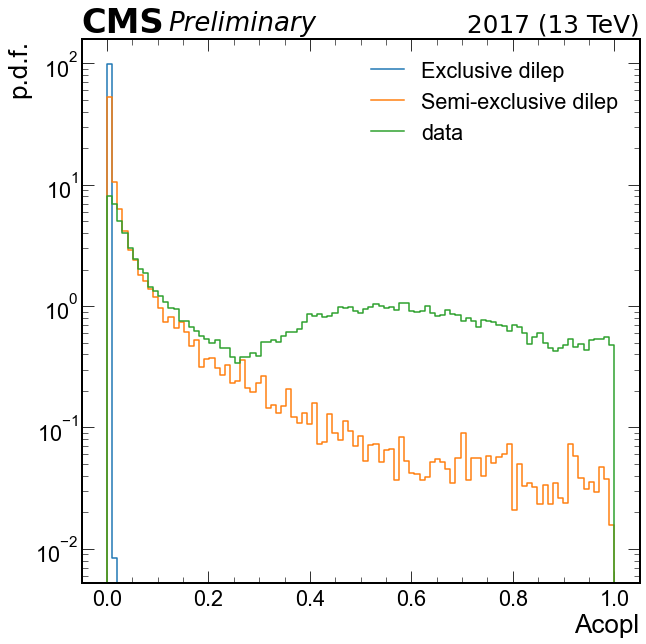

In [13]:
f, ax = plt.subplots()
PlotFromDF('Acopl',0,1,100,procc,labels, ax, log=True)

In [ ]:
#f, ax = plt.subplots()
#PlotFromDF('ExtraPfCands',0,20,20,procc,labels, ax, log=False)

In [ ]:
#f, ax = plt.subplots()
#PlotFromDF('InvMass',0,800,100,procc,labels, ax, log=True)

### Tagged protons

In central exclusive events, the tagged protons' momentum loss corresponds to the 4-momentum of the interacting photons. From proton momentum loss, denoted by $\xi=1-\Delta p/p$, we can reconstruct two quantities of the central system - the mass and the rapidity:

\begin{equation}
\begin{split}
m_{\ell\ell} &= \sqrt{s\xi_1\xi_2}\\
Y_{\ell\ell} &= \frac{1}{2}\log(\xi_1/\xi_2),
\end{split}\label{eq:eq1}
\end{equation}
In case of single dissociation (when only one proton remains intact), we can reconstruct proton momentum loss from the kinematics measured in the central detector: di-lepton mass $m_{\ell\ell}$ and pseudo-rapidity of the leptons $\eta_{\ell\pm}$, using the following formula:

\begin{equation}
\xi_\pm = \frac{1}{\sqrt{s}}[p_T(\ell+)e^{\pm\eta(\ell+)} + p_T(\ell-)e^{\pm\eta(\ell-)}] 
\label{eq:eq2}
\end{equation}


In the next block we will inspect this correlation

<b>TASK 2</b>

Write a function that will produce a 2D scatter plot of measured $\xi$ in the forward detector and the reconstructed $\xi(\ell\ell)$ using formula \ref{eq:eq2}.


HINT: Use the block below to add a new column to the dataframe with reconstructed $\xi$ named `recXi_pos` and `recXi_neg`
```python
df_signal['recXi_pos'] = USE FORMULA (2) TO COMPUTE NEGATIVE AND POSSITIVE XIs
df_signal['recXi_neg'] = USE FORMULA (2) TO COMPUTE NEGATIVE AND POSSITIVE XIs
```


In [14]:
def ComputeXi(dataframe):
    dataframe['recXi_pos'] = dataframe['XiMuMuPlus'] # USE FORMULA (2) TO COMPUTE NEGATIVE AND POSSITIVE XIs
    dataframe['recXi_neg'] = dataframe['XiMuMuMinus'] # USE FORMULA (2) TO COMPUTE NEGATIVE AND POSSITIVE XIs
    return dataframe;

The code below `Plot2DScatter(dataframe)` will plot 2D scatter plot between reconstructed $\xi$ from the two leptons and $\xi$ measured by the forward detectors:

In [15]:
def Plot2DScatter(dataframe, mask = [], proton_selection = "MultiRP"):
    if not mask.empty and len(mask) != dataframe.shape[0]:
        print('Error: bad mask, check if the mask corrsponds to the dataframe')
        return
    
    if proton_selection == "SingleRP":
        # Single-RP in pixel stations
        msk1 = mask & ( dataframe["MultiRP"] == 0) & ( dataframe["RPId1"] == 23 )
        msk2 = mask & ( dataframe["MultiRP"] == 0) & ( dataframe["RPId1"] == 123 )
    elif proton_selection == "MultiRP":
        # Multi-RP
        msk1 = mask & ( dataframe["MultiRP"] == 1 ) & ( dataframe["Arm"] == 0 )
        msk2 = mask & ( dataframe["MultiRP"] == 1 ) & ( dataframe["Arm"] == 1 )
 
    print ( len(dataframe[ "Xi" ][ msk1 ]), len(dataframe[ "Xi" ][ msk2 ]) )

    fig, axes = plt.subplots( 2, 2, figsize=(20,20) )
    axes[0,0].plot( dataframe[ "Xi" ][ msk1 ], dataframe[ "recXi_pos" ][ msk1 ], 'ko' )
    axes[0,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
    axes[0,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
    axes[0,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
    axes[0,0].set_xlim(0.,0.15)
    axes[0,0].set_ylim(0.,0.15)
    axes[0,1].plot( dataframe[ "Xi" ][ msk2 ], dataframe[ "recXi_neg" ][ msk2 ], 'ko' )
    axes[0,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
    axes[0,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
    axes[0,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
    axes[0,1].set_xlim(0.,0.15)
    axes[0,1].set_ylim(0.,0.15)
    counts, xedges, yedges, im = axes[1,0].hist2d( dataframe[ "Xi" ][ msk1 ], dataframe[ "recXi_pos" ][ msk1 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
    fig.colorbar(im, ax=axes[1,0])
    axes[1,0].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
    axes[1,0].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
    axes[1,0].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
    axes[1,0].set_xlim(0.,0.15)
    axes[1,0].set_ylim(0.,0.15)
    counts, xedges, yedges, im = axes[1,1].hist2d( dataframe[ "Xi" ][ msk2 ], dataframe[ "recXi_neg" ][ msk2 ], bins=(50,50), norm=LogNorm(), cmap='viridis' )
    fig.colorbar(im, ax=axes[1,1])
    axes[1,1].plot( (0.,0.15), (0.,0.15), 'k--', linewidth=1 )
    axes[1,1].plot( (0.,0.15), (0.,0.90*0.15), 'k:', linewidth=1 )
    axes[1,1].plot( (0.,0.15), (0.,1.10*0.15), 'k:', linewidth=1 )
    axes[1,1].set_xlim(0.,0.15)
    axes[1,1].set_ylim(0.,0.15)    

### Correlation plots - signal:

Check your results with ploting correlation plots for the signal (exclusive) events:

16496 15386


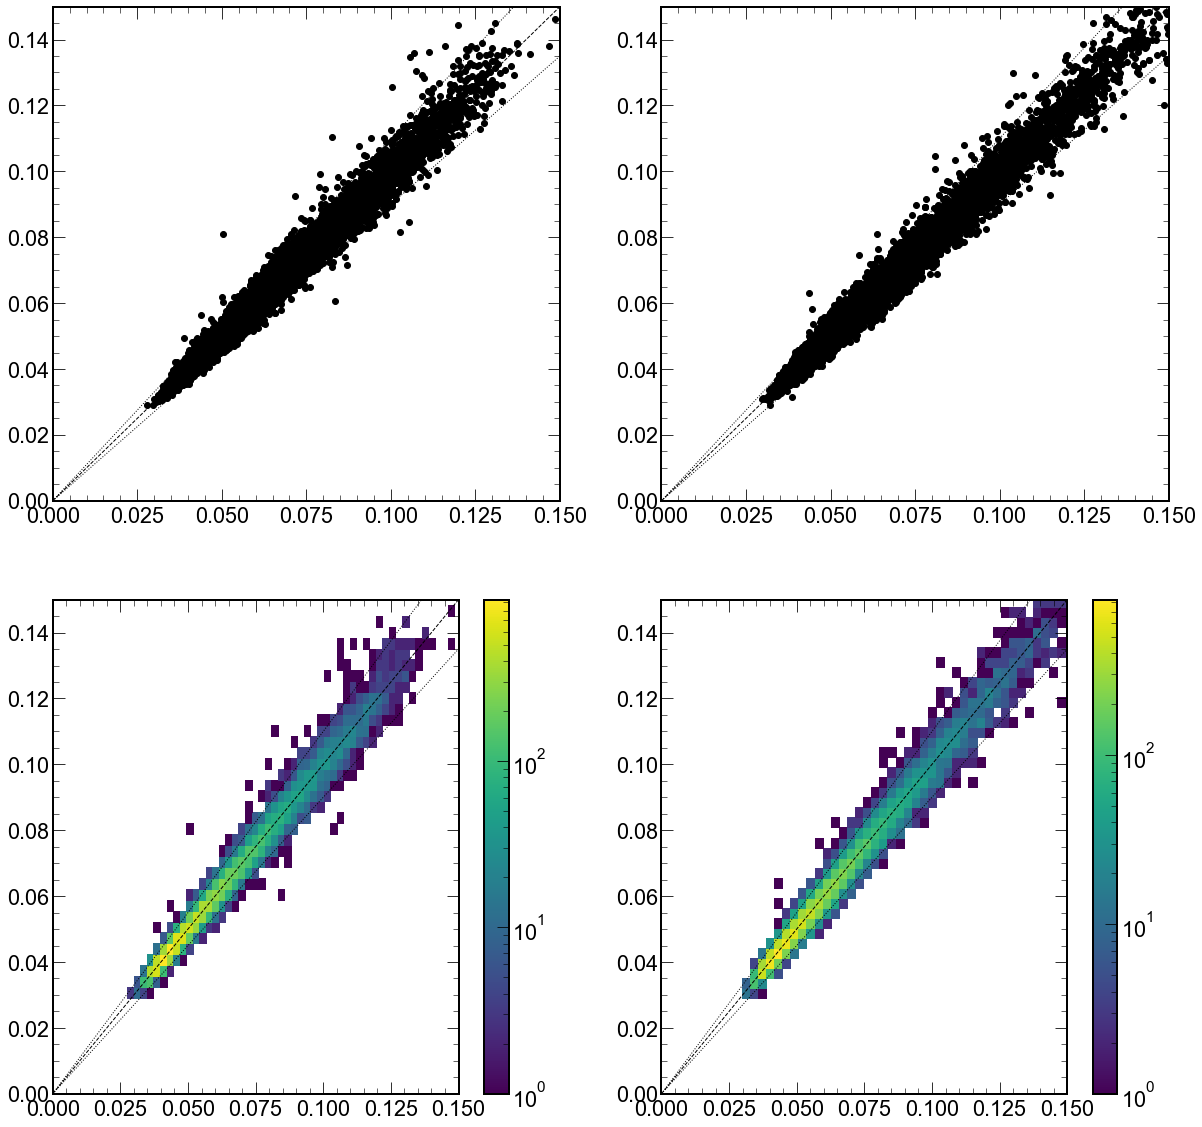

In [16]:
#before the start, lets mask events with high invariant mass, with two leptons produced back to back exclusivelly 
df_signal = df_signal_excl
msk_excl = ( df_signal["InvMass"] >= 110. ) & ( df_signal["Acopl"] <= 0.009 ) & ( df_signal["ExtraPfCands"] <= 1 )

#in addiitonl we will focus only on MultiRP reconstruction
proton_selection = "MultiRP" # "SingleRP" or "MultiRP"

#compute xi
ComputeXi(df_signal)

#plot correlations:
Plot2DScatter(df_signal, mask=msk_excl, proton_selection=proton_selection)


We can also plot the difference betweeen recontructed and measured $\xi$ values in 1D plot. It is easier to mask only

In [17]:
# add new variables to dataframes for possitivle and negative xi's :
mask_pos = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 0 )
mask_neg = msk_excl & ( df_signal["MultiRP"] == 1 ) & ( df_signal["Arm"] == 1 )

df_signal['delxi_pos'] = (1 - df_signal[ "Xi" ] / df_signal[ "recXi_pos" ])
df_signal['delxi_neg'] = (1 - df_signal[ "Xi" ] / df_signal[ "recXi_neg" ])

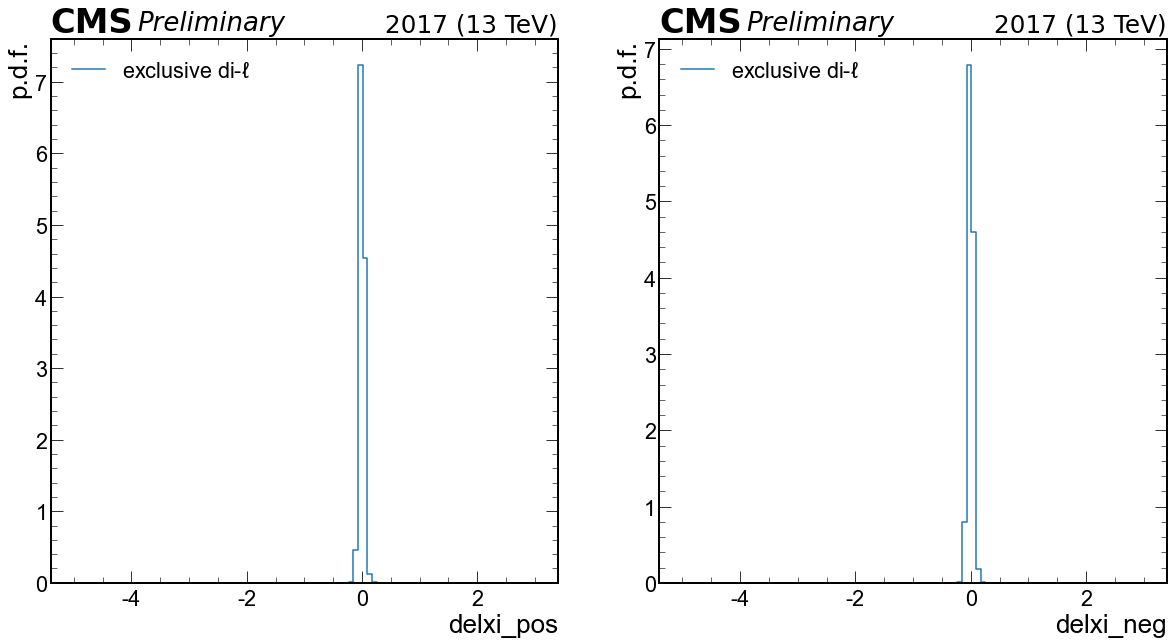

In [18]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )
PlotFromDF('delxi_pos',-5,3,100,[df_signal[ mask_pos ]],['exclusive di-$\ell$'],axes[0], log=False)
PlotFromDF('delxi_neg',-5,3,100,[df_signal[ mask_neg ]],['exclusive di-$\ell$'],axes[1], log=False)

### Correlation plots - data:

<b>TASK 3</b>

Produce correlation plots now for data events as we did for the signal

14 10


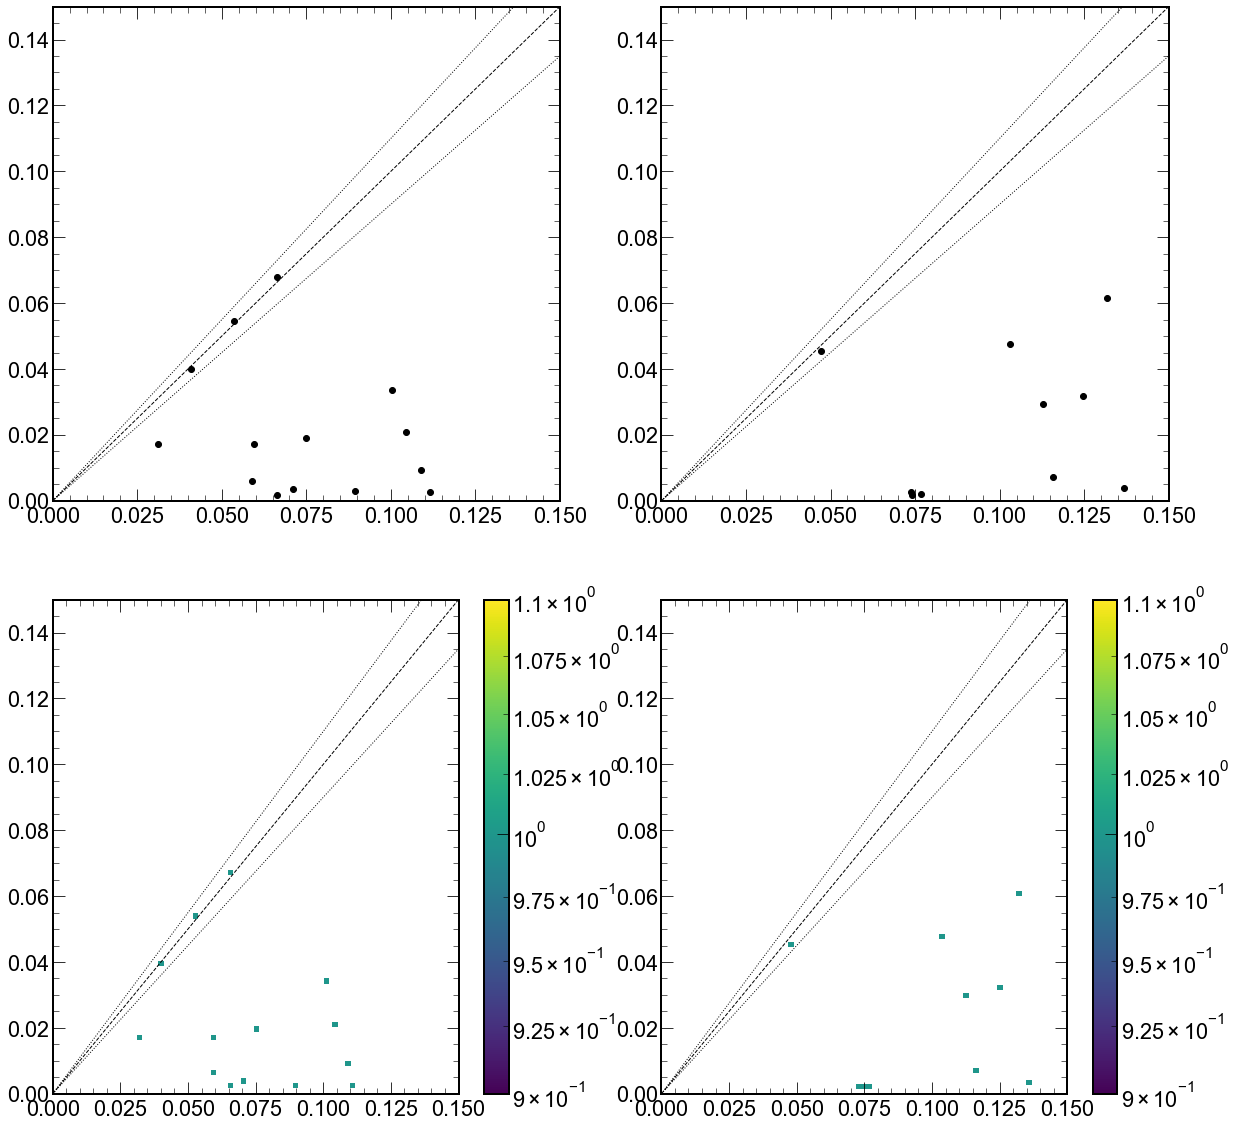

In [19]:
#MASK EVENTS WITH TWO LEPTONS PRODUCED BACK TO BACK EXCLUSEVILY
msk_data = ( df_data["InvMass"] >= 110. ) & ( df_data["Acopl"] <= 0.009 ) & ( df_data["ExtraPfCands"] <= 1 )

#in addiitonl we will focus only on MultiRP reconstruction
proton_selection = "MultiRP" # "SingleRP" or "MultiRP"

#compute xi
ComputeXi(df_data)

#plot correlations:
Plot2DScatter(df_data, mask=msk_data, proton_selection=proton_selection)

### Compare data to signal + background

In [22]:
# for not use the data as the backgund:
df_bkg = df_data

[0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0] [-5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4
 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4
  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3. ]
[0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0] [-5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4
 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4
  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3. ]
y max. = 4.82842712474619


(0.0, 4.82842712474619)

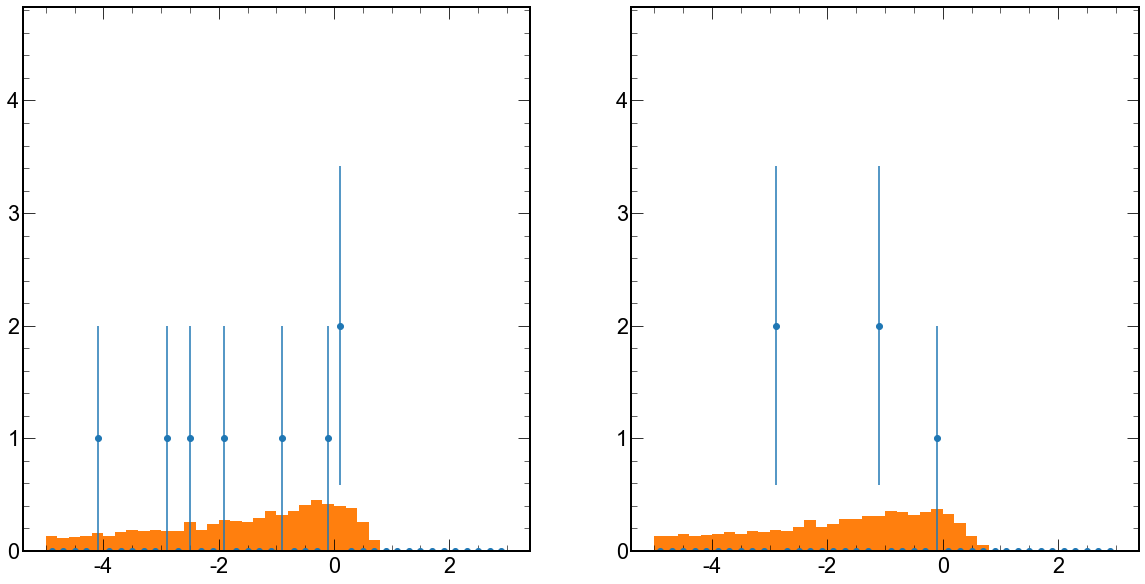

In [34]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

bins_ = 40
range_ = (-5.,3.)
resample_factor = 680

msk1_data = msk_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 0 )
msk2_data = msk_data & ( df_data["MultiRP"] == 1 ) & ( df_data["Arm"] == 1 )

msk1_bkg = ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 0 )
msk2_bkg =  ( df_bkg["MultiRP"] == 1 ) & ( df_bkg["Arm"] == 1 )


vals_1 = ( 1. - df_data[ "Xi" ][ msk1_data ] / df_data[ "XiMuMuPlus" ][ msk1_data ] )
counts_1, bin_edges_1 = np.histogram( vals_1, bins=bins_, range=range_ )
#counts_1_w, _ = np.histogram( vals_1, bins=bins_, range=range_, weights=None )
#errors_1 = np.sqrt( counts_1 ) * ( counts_1_w / counts_1 )
errors_1 = np.sqrt( counts_1 )
print ( counts_1, bin_edges_1 )

bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
#axes[0].errorbar(bin_centres_1, counts_1_w, yerr=errors_1, fmt='o')
axes[0].errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='o')

vals_2 = ( 1. - df_data[ "Xi" ][ msk2_data ] / df_data[ "XiMuMuMinus" ][ msk2_data ] )
counts_2, bin_edges_2 = np.histogram( vals_2, bins=bins_, range=range_ )
#counts_2_w, _ = np.histogram( vals_2, bins=bins_, range=range_, weights=None )
#errors_2 = np.sqrt( counts_2 ) * ( counts_2_w / counts_2 )
errors_2 = np.sqrt( counts_2 )
print ( counts_2, bin_edges_2 )

bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
#axes[1].errorbar(bin_centres_2, counts_2_w, yerr=errors_2, fmt='o')
axes[1].errorbar(bin_centres_2, counts_2, yerr=errors_2, fmt='o')

idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_] + 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_]
print ( "y max. = {}".format(y_max) )

weights_1 = None
if resample_factor > 1:
    weights_1 = np.full_like( df_bkg[ "Xi" ][ msk1_bkg ], ( 1./resample_factor ) )

vals_bkg_1 = ( 1. - df_bkg[ "Xi" ][ msk1_bkg ] / df_bkg[ "XiMuMuPlus" ][ msk1_bkg ] )
axes[0].hist( vals_bkg_1, bins=bins_, range=range_, weights=weights_1 )
axes[0].set_ylim( top=y_max )

weights_2 = None
if resample_factor > 1:
    weights_2 = np.full_like( df_bkg[ "Xi" ][ msk2_bkg ], ( 1./resample_factor ) )
    
vals_bkg_2 = ( 1. - df_bkg[ "Xi" ][ msk2_bkg ] / df_bkg[ "XiMuMuMinus" ][ msk2_bkg ] )
axes[1].hist( vals_bkg_2, bins=bins_, range=range_, weights=weights_2 )
axes[1].set_ylim( top=y_max )

5785    -1.711910e-05
39811    7.711315e-07
45170   -5.318766e-05
Name: ThY, dtype: float64
101961   -0.000036
Name: ThY, dtype: float64
y max. = 4.82842712474619


(0.0, 4.82842712474619)

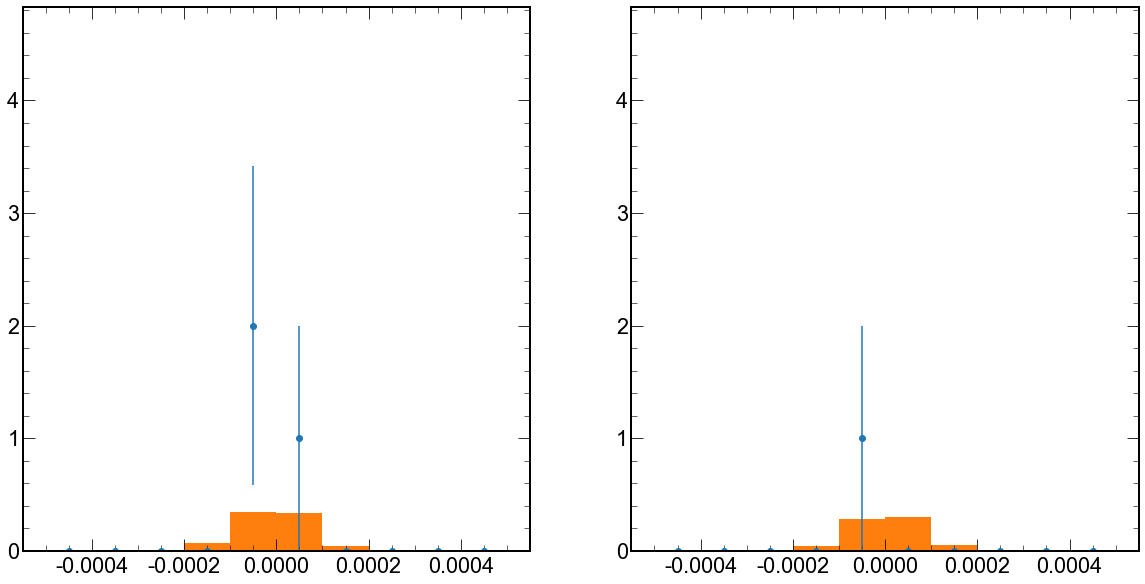

In [35]:
fig, axes = plt.subplots( 1, 2, figsize=(20,10) )

#var_ = "Xi"
#bins_ = 10
#range_ = (0.,0.2)

#var_ = "ThX"
#bins_ = 10
#range_ = (-0.0005,0.0005)

var_ = "ThY"
bins_ = 10
range_ = (-0.0005,0.0005)

#var_ = "T"
#bins_ = 10
#range_ = (-4.,0.)

#var_ = "Time"
#bins_ = 20
#range_ = (-0.5,0.5)

msk1_data_sel = ( vals_1 >= -0.20 ) & ( vals_1 <= +0.20 )
print ( df_data[ var_ ][ msk1_data ][ msk1_data_sel ] )

counts_1, bin_edges_1 = np.histogram( df_data[ var_ ][ msk1_data ][ msk1_data_sel ], bins=bins_, range=range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
axes[0].errorbar(bin_centres_1, counts_1, yerr=errors_1, fmt='o')

msk2_data_sel = ( vals_2 >= -0.20 ) & ( vals_2 <= +0.20 )
print ( df_data[ var_ ][ msk2_data ][ msk2_data_sel ] )

counts_2, bin_edges_2 = np.histogram( df_data[ var_ ][ msk2_data ][ msk2_data_sel ], bins=bins_, range=range_ )
errors_2 = np.sqrt( counts_2 )
bin_centres_2 = ( bin_edges_2[:-1] + bin_edges_2[1:] ) / 2.
axes[1].errorbar(bin_centres_2, counts_2, yerr=errors_2, fmt='o')

idx_ymax_ = np.argmax( np.concatenate( [counts_1, counts_2] ) )
y_max = np.concatenate( [counts_1, counts_2] )[idx_ymax_] + 2*np.concatenate( [errors_1, errors_2] )[idx_ymax_]
print ( "y max. = {}".format(y_max) )

msk1_bkg_sel = ( vals_bkg_1 >= -0.20 ) & ( vals_bkg_1 <= +0.20 )
axes[0].hist( df_bkg[ var_ ][ msk1_bkg ][ msk1_bkg_sel ], bins=bins_, range=range_, weights=weights_1[ msk1_bkg_sel ] )
axes[0].set_ylim( top=y_max )

msk2_bkg_sel = ( vals_bkg_2 >= -0.20 ) & ( vals_bkg_2 <= +0.20 )
axes[1].hist( df_bkg[ var_ ][ msk2_bkg ][ msk2_bkg_sel ], bins=bins_, range=range_, weights=weights_2[ msk2_bkg_sel ] )
axes[1].set_ylim( top=y_max )